In [0]:
#Import necessary packages
import keras
import numpy as np
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, Reshape, LSTM
import matplotlib.pyplot as plt
import cPickle

Using TensorFlow backend.


#Part 1: Importing and normalizing data

In [0]:
#Import dataset and normalize to [0,1]
#Has shape (num_samples, 28, 28)
(data_train, labels_train), (data_test, labels_test) = fashion_mnist.load_data()
data_train = data_train/255.0
data_test = data_test/255.0
data_train = data_train.reshape(60000, 28, 28, 1)
data_test = data_test.reshape(10000, 28, 28, 1)

#Create labels as one-hot vectors
#labels_train and labels_test have shapes (60000, 10) and (10000 10,) respectively
labels_train = keras.utils.np_utils.to_categorical(labels_train, num_classes=10)
labels_test = keras.utils.np_utils.to_categorical(labels_test, num_classes=10)

4431872/4422102 [==============================] - 0s 0us/step


#Part 2: Overfit CNN

In [0]:
#Create and train model architecture
def CNN_overfit():
    model = Sequential()
    
    
    model.add(Conv2D(256,
                    (3,3),
                    activation='sigmoid',
                    input_shape=(28,28,1)))
    model.add(MaxPooling2D(pool_size=(2,2),
                           strides=None,
                           padding='valid',
                           data_format=None))
    model.add(Conv2D(128,
                    (3,3),
                    activation='sigmoid',
                    input_shape=(28,28,1)))
    #model.add(Dropout(0.25))
    model.add(MaxPooling2D(pool_size=(2,2),
                           strides=None,
                           padding='valid',
                           data_format=None))
    model.add(Flatten())
    model.add(Dense(100,
                    activation='relu',
                    kernel_initializer='normal'))
    model.add(Dense(100,
                    activation='relu',
                    kernel_initializer='normal'))
    model.add(Dense(10,
                    activation='softmax'))
    return model

#Create instance of CNN model graph
CNN_overfit = CNN_overfit()

#Compile model using an appropriate loss and optimizer algorithm
CNN_overfit.compile(loss='categorical_crossentropy',optimizer='adam',
                 metrics=['accuracy'])

#Train the model and assign training meta-data to a variable
cnn_overfit_data = CNN_overfit.fit(data_train, labels_train, validation_data=(data_test, labels_test), epochs=200, batch_size=1024, shuffle=True)

#Print accuracy of model on testing set after training 
scores = CNN_overfit.evaluate(data_test,labels_test)
print "The accuracy of the model is: "+ str(scores[1]*100)

W0919 00:40:08.220710 139785768380288 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0919 00:40:08.283035 139785768380288 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0919 00:40:08.290707 139785768380288 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0919 00:40:08.319936 139785768380288 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0919 00:40:08.450839 139785768380288 deprecation_wrapp

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 21s 343us/step - loss: 2.3043 - acc: 0.1156 - val_loss: 2.2232 - val_acc: 0.2064
Epoch 2/200
60000/60000 [==============================] - 11s 185us/step - loss: 1.4496 - acc: 0.4898 - val_loss: 0.9041 - val_acc: 0.6798
Epoch 3/200
60000/60000 [==============================] - 11s 186us/step - loss: 0.7885 - acc: 0.7058 - val_loss: 0.7344 - val_acc: 0.7252
Epoch 4/200
60000/60000 [==============================] - 11s 186us/step - loss: 0.6847 - acc: 0.7383 - val_loss: 0.6822 - val_acc: 0.7368
Epoch 5/200
60000/60000 [==============================] - 11s 187us/step - loss: 0.6377 - acc: 0.7539 - val_loss: 0.6482 - val_acc: 0.7513
Epoch 6/200
60000/60000 [==============================] - 11s 188us/step - loss: 0.6073 - acc: 0.7681 - val_loss: 0.6079 - val_acc: 0.7707
Epoch 7/200
60000/60000 [==============================] - 11s 188us/step - loss: 0.5721 - acc: 0.7811 - val_l

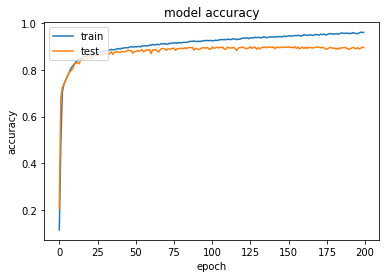

In [0]:
#Plot accuracy vs epoch
plt.plot(cnn_overfit_data.history['acc'])
plt.plot(cnn_overfit_data.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

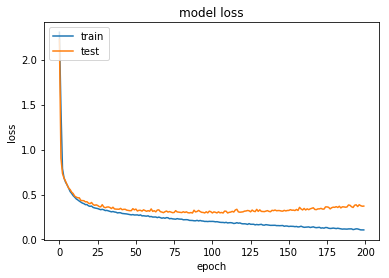

In [0]:
#Plot loss vs epoch
plt.plot(cnn_overfit_data.history['loss'])
plt.plot(cnn_overfit_data.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#Part 3: Dropout on input layer

In [0]:
#Create and train model architecture
def CNN_dropout_in():
    model = Sequential()

    model.add(Dropout(0.30, input_shape=(28,28,1)))
    model.add(Conv2D(256,
                    (3,3),
                    activation='sigmoid',
                    input_shape=(28,28,1)))
    model.add(MaxPooling2D(pool_size=(2,2),
                           strides=None,
                           padding='valid',
                           data_format=None))
    model.add(Conv2D(128,
                    (3,3),
                    activation='sigmoid',
                    input_shape=(28,28,1)))
    model.add(MaxPooling2D(pool_size=(2,2),
                           strides=None,
                           padding='valid',
                           data_format=None))
    model.add(Flatten())
    model.add(Dense(100,
                    activation='relu',
                    kernel_initializer='normal'))
    model.add(Dense(100,
                    activation='relu',
                    kernel_initializer='normal'))
    model.add(Dense(10,
                    activation='softmax'))
    return model

#Create instance of CNN model graph
CNN_dropout_in = CNN_dropout_in()

CNN_dropout_in.compile(loss='categorical_crossentropy',optimizer='adam',
                 metrics=['accuracy'])

#Train the model and assign training meta-data to a variable

cnn_dropout_in_data = CNN_dropout_in.fit(data_train, labels_train, validation_data=(data_test, labels_test), epochs=200, batch_size=1024, shuffle=True)

#Print accuracy of model on testing set after training 

scores_dropout_in = CNN_dropout_in.evaluate(data_test,labels_test)
print "The accuracy of the model is: "+ str(scores_dropout_in[1]*100)

W0919 01:18:12.035135 139785768380288 deprecation.py:506] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 12s 197us/step - loss: 2.3121 - acc: 0.1076 - val_loss: 2.2905 - val_acc: 0.2353
Epoch 2/200
60000/60000 [==============================] - 11s 189us/step - loss: 1.8019 - acc: 0.3694 - val_loss: 1.0769 - val_acc: 0.6280
Epoch 3/200
60000/60000 [==============================] - 11s 190us/step - loss: 0.8796 - acc: 0.6752 - val_loss: 0.7721 - val_acc: 0.7065
Epoch 4/200
60000/60000 [==============================] - 11s 190us/step - loss: 0.7213 - acc: 0.7232 - val_loss: 0.6832 - val_acc: 0.7407
Epoch 5/200
60000/60000 [==============================] - 11s 190us/step - loss: 0.6677 - acc: 0.7409 - val_loss: 0.6570 - val_acc: 0.7502
Epoch 6/200
60000/60000 [==============================] - 11s 190us/step - loss: 0.6350 - acc: 0.7526 - val_loss: 0.6313 - val_acc: 0.7555
Epoch 7/200
60000/60000 [==============================] - 11s 190us/step - loss: 0.6026 - acc: 0.7684 - val_l

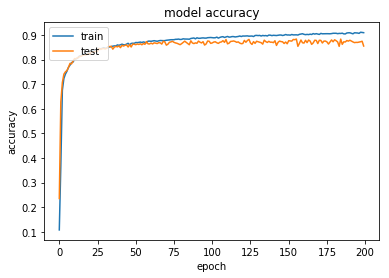

In [0]:
#Plot accuracy vs epoch

plt.plot(cnn_dropout_in_data.history['acc'])
plt.plot(cnn_dropout_in_data.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

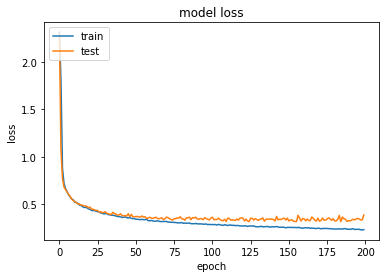

In [0]:
#Plot loss vs epoch

plt.plot(cnn_dropout_in_data.history['loss'])
plt.plot(cnn_dropout_in_data.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#Part 4: Dropout on Hidden Layers

In [0]:
#Create and train model architecture
def CNN_dropout_hidden():
    model = Sequential()

    
    model.add(Conv2D(256,
                    (3,3),
                    activation='sigmoid',
                    input_shape=(28,28,1)))
    model.add(Dropout(0.3))   
    model.add(MaxPooling2D(pool_size=(2,2),
                           strides=None,
                           padding='valid',
                           data_format=None))
    model.add(Conv2D(128,
                    (3,3),
                    activation='sigmoid',
                    input_shape=(28,28,1)))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D(pool_size=(2,2),
                           strides=None,
                           padding='valid',
                           data_format=None))
    model.add(Flatten())
    model.add(Dense(100,
                    activation='relu',
                    kernel_initializer='normal'))
    model.add(Dense(100,
                    activation='relu',
                    kernel_initializer='normal'))
    model.add(Dense(10,
                    activation='softmax'))
    
    return model

#Create instance of CNN model graph
CNN_dropout_hidden = CNN_dropout_hidden()

CNN_dropout_hidden.compile(loss='categorical_crossentropy',optimizer='adam',
                 metrics=['accuracy'])

#Train the model and assign training meta-data to a variable

cnn_dropout_hidden_data = CNN_dropout_hidden.fit(data_train, labels_train, validation_data=(data_test, labels_test), epochs=200, batch_size=1024, shuffle=True)

#Print accuracy of model on testing set after training 

scores_dropout_hidden = CNN_dropout_hidden.evaluate(data_test,labels_test)
print "The accuracy of the model is: "+ str(scores_dropout_hidden[1]*100)

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 20s 334us/step - loss: 2.3136 - acc: 0.1020 - val_loss: 2.2976 - val_acc: 0.1000
Epoch 2/200
60000/60000 [==============================] - 19s 324us/step - loss: 1.7913 - acc: 0.3812 - val_loss: 1.2284 - val_acc: 0.5967
Epoch 3/200
60000/60000 [==============================] - 19s 324us/step - loss: 0.9072 - acc: 0.6675 - val_loss: 0.9069 - val_acc: 0.6907
Epoch 4/200
60000/60000 [==============================] - 19s 324us/step - loss: 0.7557 - acc: 0.7195 - val_loss: 0.8308 - val_acc: 0.7131
Epoch 5/200
60000/60000 [==============================] - 19s 324us/step - loss: 0.6831 - acc: 0.7402 - val_loss: 0.7326 - val_acc: 0.7456
Epoch 6/200
60000/60000 [==============================] - 19s 323us/step - loss: 0.6409 - acc: 0.7545 - val_loss: 0.7325 - val_acc: 0.7463
Epoch 7/200
60000/60000 [==============================] - 19s 324us/step - loss: 0.6086 - acc: 0.7678 - val_l

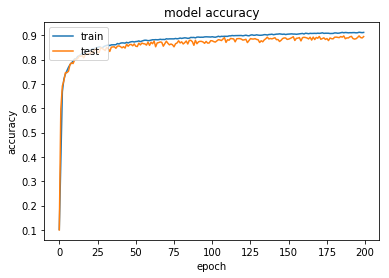

In [0]:
#Plot accuracy vs epoch
plt.plot(cnn_dropout_hidden_data.history['acc'])
plt.plot(cnn_dropout_hidden_data.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

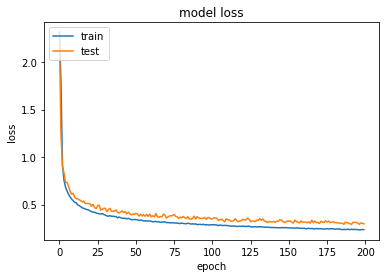

In [0]:
#Plot loss vs epoch
plt.plot(cnn_dropout_hidden_data.history['loss'])
plt.plot(cnn_dropout_hidden_data.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#Part 5: Dropout on Input and Hidden Layers

In [0]:
#Create and train model architecture
def CNN_dropout_both():

    
    model = Sequential()

    
    model.add(Dropout(0.30, input_shape=(28,28,1)))
    model.add(Conv2D(256,
                    (3,3),
                    activation='sigmoid',
                    input_shape=(28,28,1)))
    model.add(Dropout(0.3))   
    model.add(MaxPooling2D(pool_size=(2,2),
                           strides=None,
                           padding='valid',
                           data_format=None))
    model.add(Conv2D(128,
                    (3,3),
                    activation='sigmoid',
                    input_shape=(28,28,1)))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D(pool_size=(2,2),
                           strides=None,
                           padding='valid',
                           data_format=None))
    model.add(Flatten())
    model.add(Dense(100,
                    activation='relu',
                    kernel_initializer='normal'))
    model.add(Dense(100,
                    activation='relu',
                    kernel_initializer='normal'))
    model.add(Dense(10,
                    activation='softmax'))
    
    return model

#Create instance of CNN model graph
CNN_dropout_both = CNN_dropout_both()

CNN_dropout_both.compile(loss='categorical_crossentropy',optimizer='adam',
                 metrics=['accuracy'])

#Train the model and assign training meta-data to a variable

cnn_dropout_both_data = CNN_dropout_both.fit(data_train, labels_train, validation_data=(data_test, labels_test), epochs=200, batch_size=1024, shuffle=True)

#Print accuracy of model on testing set after training 

scores_dropout_both = CNN_dropout_both.evaluate(data_test,labels_test)
print "The accuracy of the model is: "+ str(scores_dropout_both[1]*100)

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 20s 334us/step - loss: 2.3410 - acc: 0.1007 - val_loss: 2.3036 - val_acc: 0.1000
Epoch 2/200
60000/60000 [==============================] - 19s 324us/step - loss: 2.1244 - acc: 0.2633 - val_loss: 1.6883 - val_acc: 0.5294
Epoch 3/200
60000/60000 [==============================] - 19s 323us/step - loss: 1.1203 - acc: 0.6064 - val_loss: 1.0178 - val_acc: 0.6656
Epoch 4/200
60000/60000 [==============================] - 19s 324us/step - loss: 0.8276 - acc: 0.6907 - val_loss: 0.8416 - val_acc: 0.7225
Epoch 5/200
60000/60000 [==============================] - 19s 325us/step - loss: 0.7281 - acc: 0.7240 - val_loss: 0.7852 - val_acc: 0.7190
Epoch 6/200
60000/60000 [==============================] - 19s 325us/step - loss: 0.6889 - acc: 0.7335 - val_loss: 0.7391 - val_acc: 0.7430
Epoch 7/200
60000/60000 [==============================] - 19s 325us/step - loss: 0.6557 - acc: 0.7451 - val_l

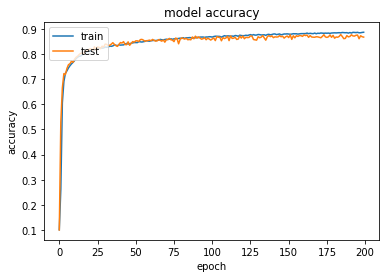

In [0]:
#Plot accuracy vs epoch

plt.plot(cnn_dropout_both_data.history['acc'])
plt.plot(cnn_dropout_both_data.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

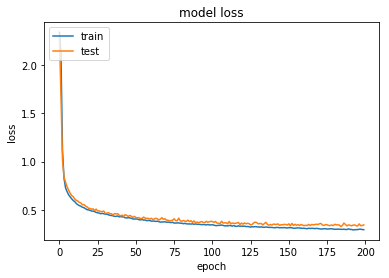

In [0]:
#Plot loss vs epoch

plt.plot(cnn_dropout_both_data.history['loss'])
plt.plot(cnn_dropout_both_data.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#Part 6: Creating a CLDNN on Radio ML data

In [0]:
#Download RML 2016.10b dataset and untar file
!wget http://opendata.deepsig.io/datasets/2016.10/RML2016.10b.tar.bz2
!tar -xvjf RML2016.10b.tar.bz2

#Extract high SNR data and obtain their corresponding lables 
Xd = cPickle.load(open("RML2016.10b.dat",'rb'))
snrs,mods = map(lambda j: sorted(list(set(map(lambda x: x[j], Xd.keys())))), [1,0])
X = []
lbl = []
for mod in mods:
    for snr in snrs:
        if snr > 0:
            X.append(Xd[(mod,snr)])
            for i in range(Xd[(mod,snr)].shape[0]):  lbl.append((mod,snr))
X = np.vstack(X)

np.random.seed(2016)
n_examples = X.shape[0]
n_train = n_examples * 0.8
n_train = int(n_train)
train_idx = np.random.choice(range(0,n_examples), size=n_train, replace=False)
test_idx = list(set(range(0,n_examples))-set(train_idx))
X_train = X[train_idx]
X_test =  X[test_idx]
def to_onehot(yy):
    yy1 = np.zeros([len(yy), max(yy)+1])
    yy1[np.arange(len(yy)),yy] = 1
    return yy1
Y_train = to_onehot(map(lambda x: mods.index(lbl[x][0]), train_idx))
Y_test = to_onehot(map(lambda x: mods.index(lbl[x][0]), test_idx))

#Re-shape data to appropriate dimensions 
X_train = X_train.reshape(432000, 2, 128, 1)
X_test = X_test.reshape(108000, 2, 128, 1)

--2019-09-19 04:05:54--  http://opendata.deepsig.io/datasets/2016.10/RML2016.10b.tar.bz2
Resolving opendata.deepsig.io (opendata.deepsig.io)... 52.14.91.165
Connecting to opendata.deepsig.io (opendata.deepsig.io)|52.14.91.165|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1245608913 (1.2G) [application/x-bzip2]
Saving to: ‘RML2016.10b.tar.bz2’

RML2016.10b.tar.bz2 100%[===================>]   1.16G  7.17MB/s    in 2m 3s   

2019-09-19 04:07:58 (9.63 MB/s) - ‘RML2016.10b.tar.bz2’ saved [1245608913/1245608913]

RML2016.10b.dat
LICENSE.TXT


In [0]:
#Create and train model architecture
def cldnn():
    model = Sequential()
    
    
    model.add(Conv2D(256,
                    (1,3),
                    activation='relu',
                    input_shape=(2,128,1)))
    model.add(Dropout(0.2))   
    model.add(Conv2D(256,
                    (2,3),
                    activation='relu',
                    input_shape=(2,128,1)))
    model.add(Conv2D(80,
                    (1,3),
                    activation='relu',
                    input_shape=(2,128,1)))
    model.add(Dropout(0.2))   
    model.add(Conv2D(80,
                    (1,3),
                    activation='relu',
                    input_shape=(2,128,1)))
    model.add(Reshape((120,80)))
    model.add(LSTM(50))
    model.add(Dense(128,
                    activation='relu',
                    kernel_initializer='normal'))
    model.add(Dense(10,
                    activation='softmax'))
    
    return model

#Create instance of CNN model graph
cldnn = cldnn()

cldnn.compile(loss='categorical_crossentropy',optimizer='adam',
                 metrics=['accuracy'])

#Train the model and assign training meta-data to a variable

cldnn_data = cldnn.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=100, batch_size=2048, shuffle=True)

#Print accuracy of model on testing set after training 

scores_cldnn = cldnn.evaluate(X_test, Y_test)
print "The accuracy of the model is: "+ str(scores_cldnn[1]*100)

Train on 432000 samples, validate on 108000 samples
Epoch 1/100
432000/432000 [==============================] - 227s 525us/step - loss: 2.1597 - acc: 0.1574 - val_loss: 1.9092 - val_acc: 0.2349
Epoch 2/100
432000/432000 [==============================] - 222s 513us/step - loss: 1.6536 - acc: 0.3115 - val_loss: 1.3947 - val_acc: 0.4002
Epoch 3/100
432000/432000 [==============================] - 221s 513us/step - loss: 1.1325 - acc: 0.4845 - val_loss: 0.8956 - val_acc: 0.5731
Epoch 4/100
432000/432000 [==============================] - 222s 513us/step - loss: 0.8660 - acc: 0.5959 - val_loss: 0.7243 - val_acc: 0.6767
Epoch 5/100
432000/432000 [==============================] - 221s 513us/step - loss: 0.5940 - acc: 0.7173 - val_loss: 0.5332 - val_acc: 0.7361
Epoch 6/100
432000/432000 [==============================] - 221s 513us/step - loss: 0.5188 - acc: 0.7392 - val_loss: 0.5249 - val_acc: 0.7343
Epoch 7/100
432000/432000 [==============================] - 221s 512us/step - loss: 0.486

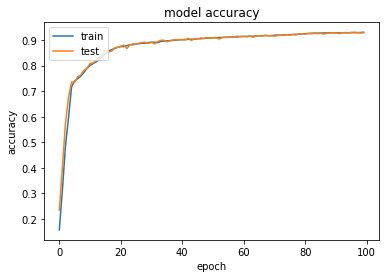

In [0]:
#Plot accuracy vs epoch
plt.plot(cldnn_data.history['acc'])
plt.plot(cldnn_data.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

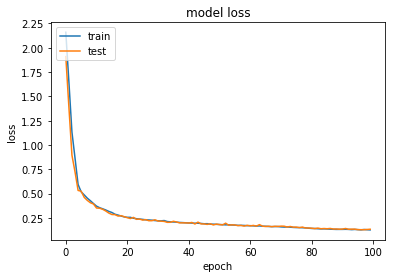

In [0]:
#Plot loss vs epoch
plt.plot(cldnn_data.history['loss'])
plt.plot(cldnn_data.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()